In [1]:
import os
import io

from IPython.display import Image
from google.cloud import vision

In [2]:
os.environ["PROJECT_ID"] = "text-analysis-323506"

#### Create a new Google Cloud service account to access the APIs programmatically.

##### Following command creates a Google Cloud Service account, which is required to access APIs. This command should be run only once. When ran for the first time, it create a service account, details of which can be found in IAM & Admin section of GCP console

In [4]:
%%bash

# These should be run only once. These commands setup a cloud service account with required permissions to call APIs
gcloud iam service-accounts create my-vision-sa --display-name "vision api account"

created key [292a58b7b438aac6308fb2806275c10387c8d635] of type [json] as [/home/jupyter/key.json] for [my-vision-sa@text-analysis-323506.iam.gserviceaccount.com]


In [3]:
%%bash

gcloud iam service-accounts keys create ~/key.json --iam-account my-vision-sa@${PROJECT_ID}.iam.gserviceaccount.com

created key [6abe0297efb1add73519a12101906d4b08744c35] of type [json] as [/home/jupyter/key.json] for [my-vision-sa@text-analysis-323506.iam.gserviceaccount.com]


In [4]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.abspath("/home/jupyter/key.json")

#### Create a Google Cloud Vision api client object

In [5]:
vision_client = vision.ImageAnnotatorClient()

## Text Detection

This API detects all kinds of texts in the queried image. 

In [74]:
img_path = './data/gsuite.jpg'

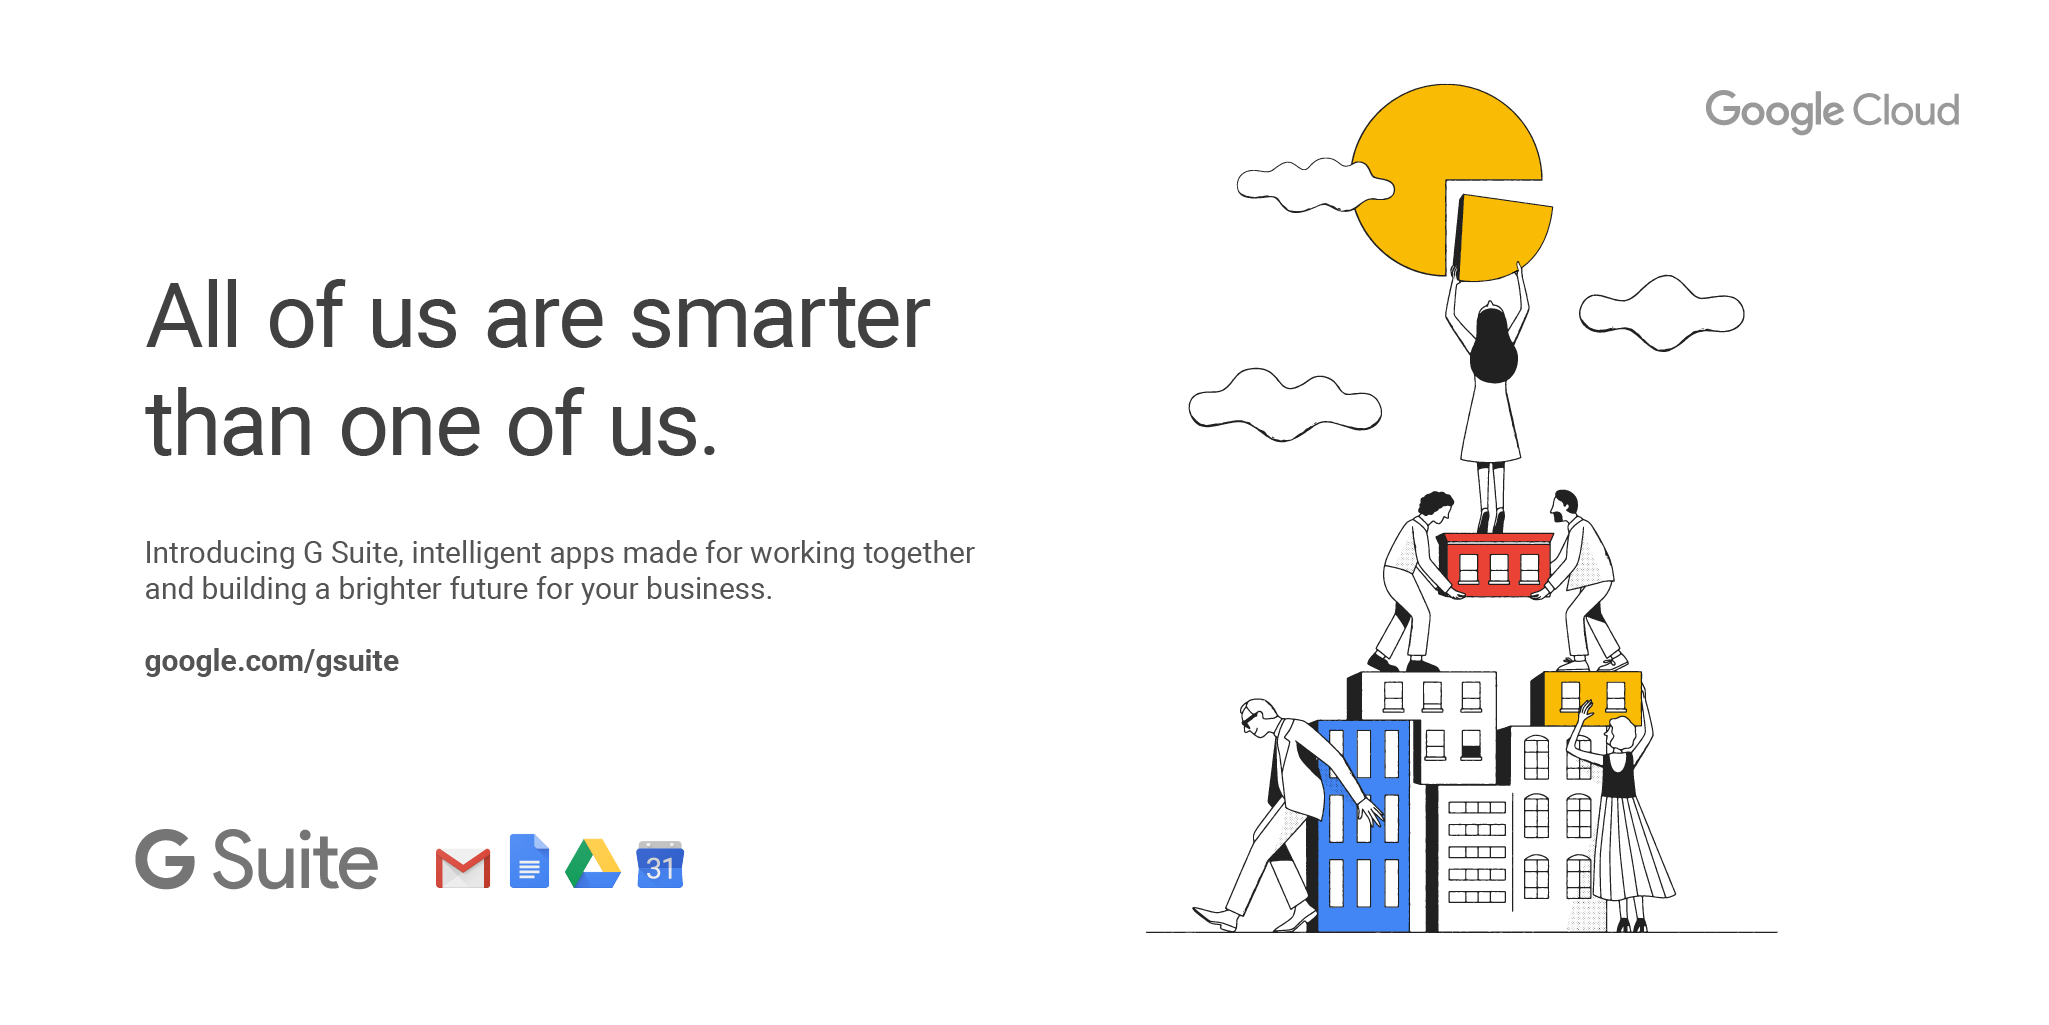

In [77]:
Image(filename=img_path, width=700, height=500) 

In [78]:
with io.open(img_path, 'rb') as image_file:
    content = image_file.read()
    
image_object = vision.Image(content=content)

In [79]:
# Send a request to cloud vision api client to detect texts in input image
response = vision_client.text_detection(image=image_object)

In [80]:
response.text_annotations[0].description.replace('\n', '\n ')

'Google Cloud\n All of us are smarter\n than one of us.\n Introducing G Suite, intelligent apps made for working together\n and building a brighter future for your business.\n google.com/gsuite\n G Suite MB AE\n h田田\n 田 田田\n '

##### As it can be seen, vision api's text_detection end point was able to detect all the texts in the image. It even added new line characters.

## Label Detection

Label detection APIs detects and returns a list of labels of what is in the queried image.

In [6]:
img_path = './data/dog.jpg'

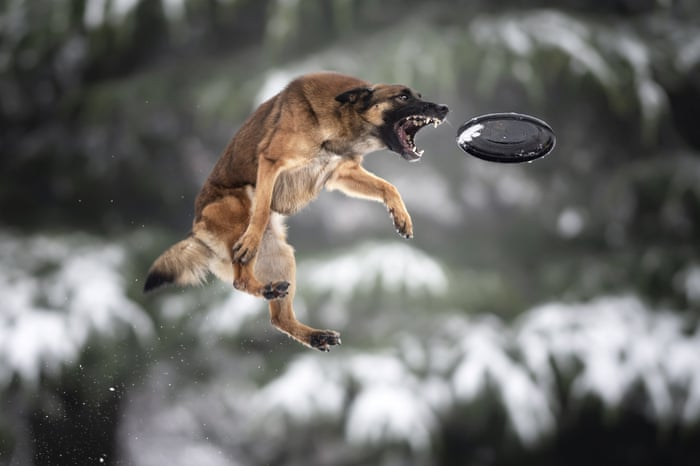

In [7]:
Image(filename=img_path, width=400, height=400) 

In [8]:
with io.open(img_path, 'rb') as image_file:
    content = image_file.read()
    
image_object = vision.Image(content=content)

In [9]:
# Send a request to cloud vision api client to detect texts in input image
response = vision_client.label_detection(image=image_object)

In [13]:
# Response with the highest confidence
print(f"Label: {response.label_annotations[0].description}, Confidence: {response.label_annotations[0].score}")

Label: Dog, Confidence: 0.9537229537963867


In [12]:
# Other responses
for responses in response.label_annotations:
    print(f"Label: {responses.description}, Confidence: {responses.score}")

Label: Dog, Confidence: 0.9537229537963867
Label: Dog breed, Confidence: 0.916549801826477
Label: Carnivore, Confidence: 0.8981429934501648
Label: Disc dog, Confidence: 0.8752760887145996
Label: Flying disc, Confidence: 0.8572475910186768
Label: Frisbee games, Confidence: 0.8473882079124451
Label: Fawn, Confidence: 0.8161194324493408
Label: Companion dog, Confidence: 0.8147051930427551
Label: Tail, Confidence: 0.7616311311721802
Label: Snout, Confidence: 0.7511301040649414


##### Vision API's label_detection returned multiple labels for the input image. And all of them make sense.